## Dataset

In [ ]:
import tensorflow as tf
import os

data_zip = tf.keras.utils.get_file('dataset.zip',
                                        extract=True,
                                        cache_subdir=os.path.abspath('.'),
                                        # origin="https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/apple2orange.zip")
                                        # origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip')
                                        origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/vangogh2photo.zip')


In [ ]:
os.mkdir('./output')
os.mkdir('./models')

## Build model

In [1]:
from model import CycleGAN

gan = CycleGAN(mode='train', base='resnet', verbose=False)
gan.build()
gan.compile(learning_rate=2e-4, cycle_loss_weight=3, identity_loss_weight=0, 
            disc_loss_weight=0.5, disc_2_loss_weight=0.5)

Using TensorFlow backend.


## Training

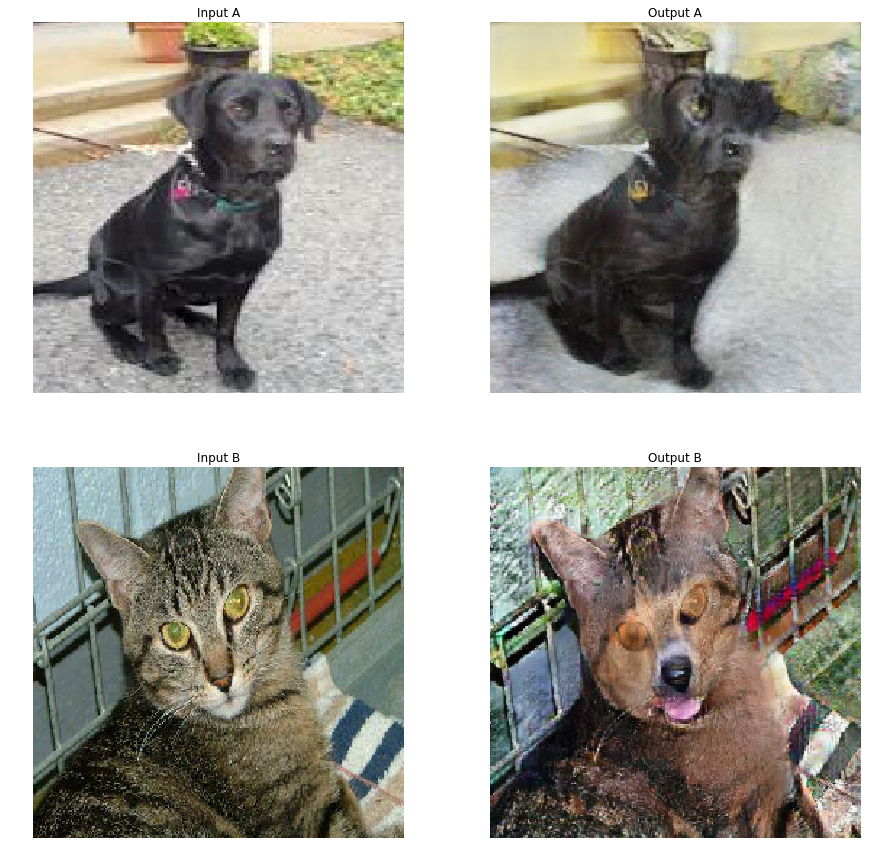

[Epoch 200/200] [Batch 2901/3000] [D_A loss: 0.110101] [D_B loss: 0.119209] [D_A_2 loss: 0.102383] [D_B_2 loss: 0.227283] [G loss: 1.587941] time: 0.7304625511169434
[Epoch 200/200] [Batch 2902/3000] [D_A loss: 0.087382] [D_B loss: 0.086427] [D_A_2 loss: 0.116094] [D_B_2 loss: 0.180493] [G loss: 1.366536] time: 0.3338170051574707
[Epoch 200/200] [Batch 2903/3000] [D_A loss: 0.132160] [D_B loss: 0.116754] [D_A_2 loss: 0.161855] [D_B_2 loss: 0.091940] [G loss: 1.325557] time: 0.3401813507080078
[Epoch 200/200] [Batch 2904/3000] [D_A loss: 0.149941] [D_B loss: 0.212397] [D_A_2 loss: 0.130013] [D_B_2 loss: 0.297671] [G loss: 1.474626] time: 0.33673906326293945
[Epoch 200/200] [Batch 2905/3000] [D_A loss: 0.130215] [D_B loss: 0.120892] [D_A_2 loss: 0.112994] [D_B_2 loss: 0.100464] [G loss: 1.226848] time: 0.33600306510925293
[Epoch 200/200] [Batch 2906/3000] [D_A loss: 0.065377] [D_B loss: 0.104567] [D_A_2 loss: 0.118268] [D_B_2 loss: 0.156065] [G loss: 1.619048] time: 0.34249234199523926
[

In [2]:
gan.train('../dataset/cat2dog_clean/training_set/dogs/*.jpg', '../dataset/cat2dog_clean/training_set/cats/*.jpg', epochs=200, decay_from=100, 
          steps_per_epoch=3000, true_label_value=1, batch_size=1, image_save_path='../output/20190325/', model_save_path='../models/20190325/',
          save_image_every_step=100, save_model_every_epoch=1,
          show_image=True, load_model=False, model_load_path='../models/20190325/')

## Test

In [ ]:
gan.test('../dataset/cat2dog_clean/test_set/dogs/*.jpg', '../models/cat_2_dog_cl3/model-gan.h5', is_a2b=True,
         batch_size=1, image_save_path='../output/cat_2_dog_test_cl3/testA/', show_image=True, show_image_every_step=50)

In [ ]:
gan.test('../dataset/cat2dog_clean/test_set/cats/*.jpg', '../models/cat_2_dog_cl3/model-gan.h5', is_a2b=False,
         batch_size=1, image_save_path='../output/cat_2_dog_test_cl3/testB/', show_image=True, show_image_every_step=50)

## Save model to Google cloud

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model-disc-a.h5'})
uploaded.SetContentFile('./models/model-disc-a.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-disc-b.h5'})
uploaded.SetContentFile('./models/model-disc-b.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-gan.h5'})
uploaded.SetContentFile('./models/model-gan.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

## Get model from Google cloud

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# os.makedirs('./logo_checkpoints/')
file_id = '1-GwlVFw_pYxEq_v61k-OngKvQu6iRMY3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-a.h5')
file_id = '1lkUiUNrLW9BofTAVb70iSfjNH4KYkfWM'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-b.h5')
file_id = '1GXXUxSmfYJVZ047hqU52HQt8lXDW5iC3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-gan.h5')
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))